In [19]:
import numpy as np
from matplotlib import pylab as plt
import detest
import sympy

In [24]:
%mkdir data

In [25]:
def plot_stack_and_save(SOLS, xlim, tlim, fname):
    xs = np.linspace(*xlim)
    ts = np.linspace(*tlim)
    grid = np.meshgrid(xs,ts)
    US = []
    for S in SOLS:
        u = S(grid[0],grid[1])
        plt.figure()
        for i,t in enumerate(ts):
            plt.plot(xs,u[i,:],'-+')
        US.append(u)
    UDATA = np.stack(US)
    np.savez(f"data/{fname}",{'U':UDATA})

# Analytical solutions to burger's equation

\begin{equation}
\partial_t u + u \partial_x u = 0
\end{equation}

In [26]:
def make_linear(a,b):
    def linear(x,t):
        return (a*x+b)/(a*t+1)
    return linear
def riemann(uL,uR):
    def sol(x,t):
        if uL>=uR:
            S = 0.5*(uL+uR)
            return uL if x<S*t else uR
        else:
            if(x<uL*t): return uL
            if(x>=uR*t): return uR
    
            f = (x/t - uL)/(uR-uL);
            return (1.0-f)*uL + f*(uR)
    return np.vectorize(sol)
@np.vectorize
def parabola(x,t):
    if t==0.0:
        return 1.0-x**2.0
    else:
        return 1.0 - (1.0-np.sqrt(1.0+4.0*t*(t-x)) )**2.0 / (2.0*t)**2.0

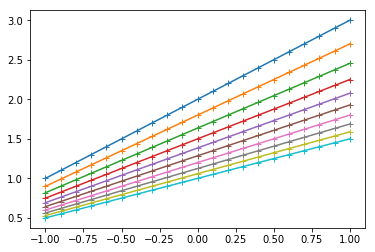

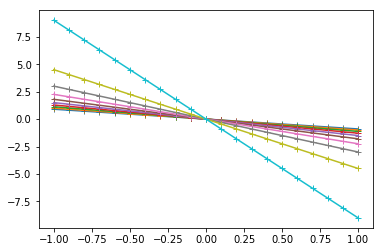

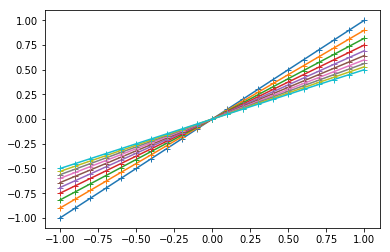

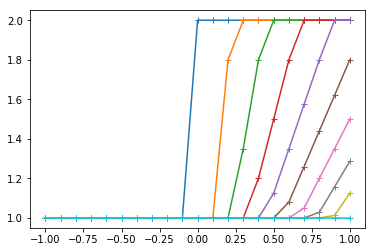

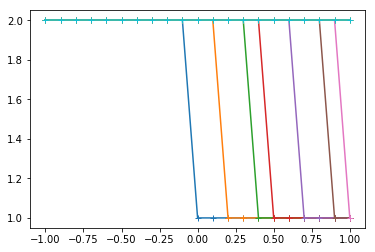

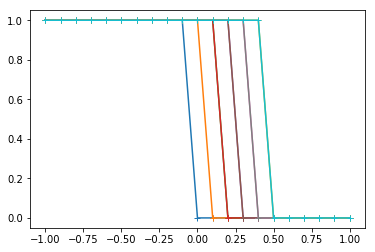

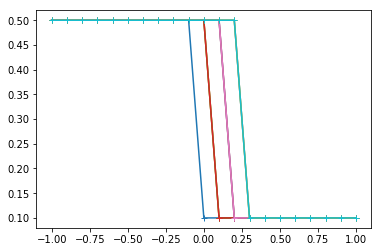

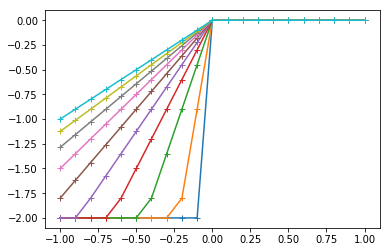

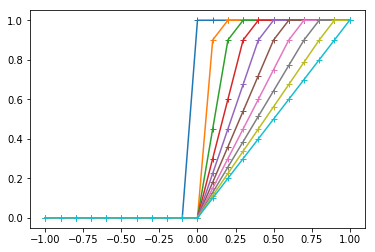

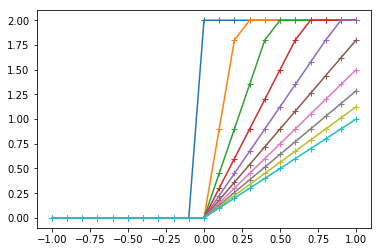

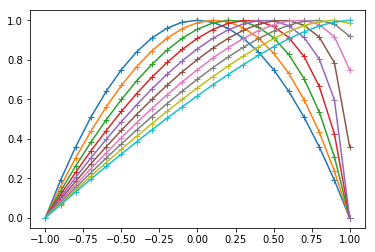

In [27]:
SOLS = [
    make_linear(1,2),
    make_linear(-0.9,0),
    make_linear(1,0),
    riemann(1.0,2.0),
    riemann(2.0,1.0),
    riemann(1.0,0.0),
    riemann(0.5,0.1),
    riemann(-2.0,0.0),
    riemann(0.0,1.0),
    riemann(0.0,2.0),
    parabola
]
plot_stack_and_save(SOLS, (-1,1,21), (0,1,10), "burgers")

# The KdV Equation
\begin{equation}
\partial_t u + 6 u \partial_x u + \partial_{xxx}u =  0
\end{equation}

The citation for the analytical solutions is:
>The Korteweg-de Vries Equation: History, exact Solutions, and graphical Representation  
> by Klaus Brauer, University of Osnabrück/Germany1  
> May 2000


In [28]:
sech = lambda x : np.cosh(x)**-1
csch = lambda x : np.sinh(x)**-1
def make_soliton(beta):
    def u(x,t):
        return 0.5*beta*sech(0.5*np.sqrt(beta)*(x-beta*t))**2
    return u
def make_left_soliton(beta):
    def u(x,t):
        return - 0.5*beta*csch(0.5*np.sqrt(beta)*(x-beta*t))**2.0
    return u
def double_soliton(x,t):
    return - 12.0*(
        3.0 + 4.0*np.cosh(2.0*x-8.0*t) + np.cosh(4.0*x-64.0*t)
    ) / (
        3.0*np.cosh(x-28.0*t) + np.cosh(3.0*x-36*t)
    )**2

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in cosh
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in sinh
  


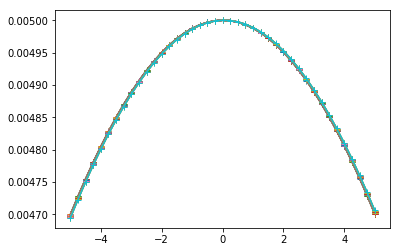

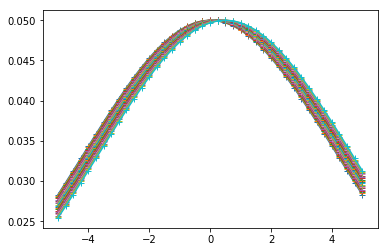

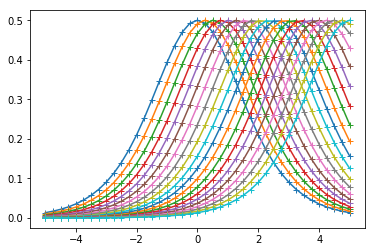

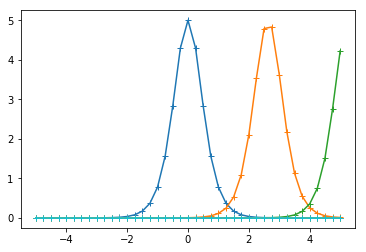

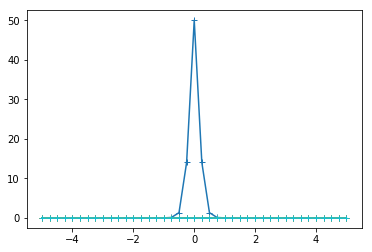

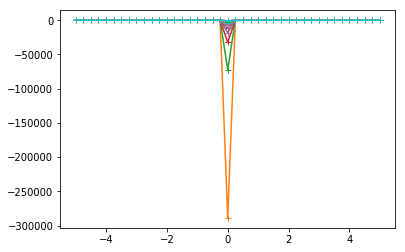

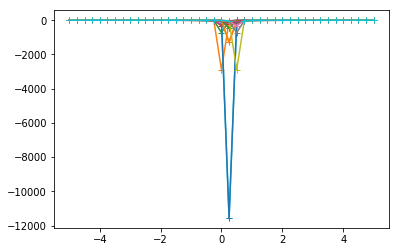

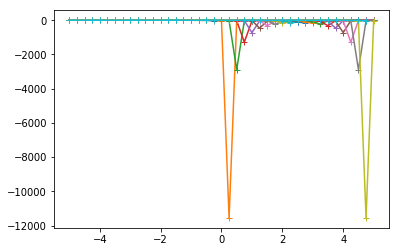

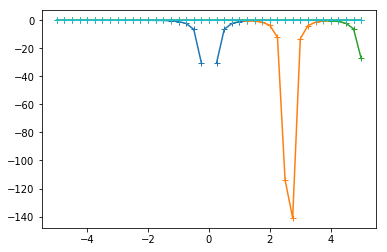

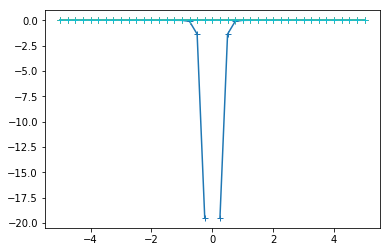

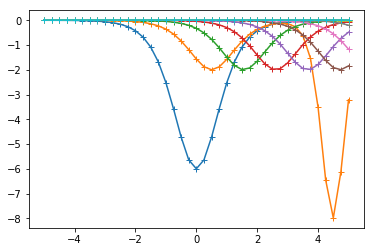

In [29]:
SOLS = [
    make_soliton(0.01),
    make_soliton(0.1),
    make_soliton(1.0),
    make_soliton(10.0),
    make_soliton(100.0),
    make_left_soliton(0.01),
    make_left_soliton(0.1),
    make_left_soliton(1.0),
    make_left_soliton(10.0),
    make_left_soliton(100.0),
    double_soliton
]
plot_stack_and_save(SOLS,(-5,5,41),(0,5.0,20),"KdV")

# The heat equation

[0.19350920659919693, -0.024188650824899606, 0.007167007651822101, -0.0030235813531124464, 0.0015480736527935708, -0.0008958759564777596, 0.0005641667830880341, -0.00037794766913905347, 0.00026544472784526056, -0.00019350920659919448, 0.00014538633102868976, -0.00011198449455971839, 8.807883777842609e-05, -7.052084788600294e-05, 5.733606121457203e-05, -4.724345864238052e-05, 3.9387178220883785e-05, -3.318059098065654e-05, 2.8212451756695488e-05, -2.418865082489838e-05]


<string>:2: RuntimeWarning: divide by zero encountered in double_scalars
<string>:2: RuntimeWarning: invalid value encountered in double_scalars


[array(-3.63829371e-17), array(0.5), array(-2.00477409e-17), array(0.5), array(1.05188764e-16), array(-6.13962064e-17), array(4.52030431e-17), array(-3.63829371e-17), array(3.07024842e-17), array(-2.66839143e-17), array(8.60766276e-17), array(-2.13007247e-17), array(-2.38812476e-17), array(-1.78124796e-17), array(4.83599502e-17), array(-1.53451844e-17), array(-1.01451385e-17), array(-1.34980528e-17), array(3.21834289e-17), array(-1.20587386e-17)]
[12.900613773279797, 6.661338147750939e-16, 0.4778005101214735, 3.0531133177191805e-16, 0.10320491018623813, 2.0816681711721685e-16, 0.03761111887253568, 1.5439038936193583e-16, 0.017696315189684085, 1.240327285323417e-16, 0.009692422068579454, 1.0321604682062002e-16, 0.0058719225185617, 8.847089727481716e-17, 0.0038224040809715486, 7.762887554996212e-17, 0.0026258118813922353, 6.895525817007808e-17, 0.0018808301171130872, 6.201636426617085e-17]
[0.5160245509311918, 2.7755575615628914e-17, 0.019112020404858942, 1.214306433183765e-17, 0.0041281

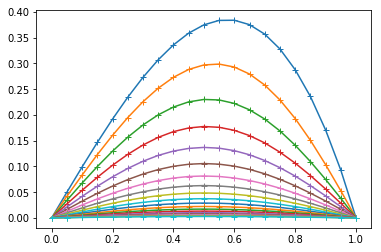

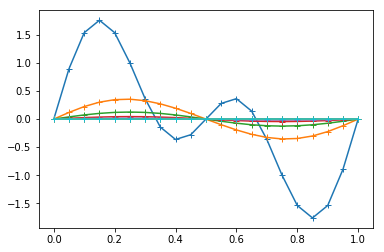

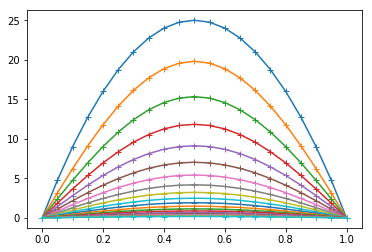

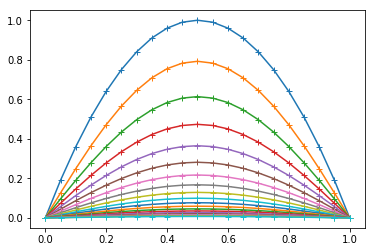

In [30]:
PAR = [
    {'u0':lambda x: -x**3+x},
    {'u0':lambda x: sympy.sin(2.0*x*sympy.pi)+sympy.sin(4.0*x*sympy.pi)},
    {'u0':lambda x: 100.0*(x-x**2)},
    {},
]
def wrap(f):
    def u(x,t):
        xt = np.c_[x.ravel(),t.ravel()]
        F = f(xt)
        return F['u'].reshape(x.shape)
    return u
SOLS = [ wrap(detest.oracles.HeatEquation1D(P)) for P in PAR ]
plot_stack_and_save(SOLS,(0,1,21),(0,0.5,20),"heat")

# The wave equation

[0.19350920659919693, -0.024188650824899606, 0.007167007651822101, -0.0030235813531124464, 0.0015480736527935708, -0.0008958759564777596, 0.0005641667830880341, -0.00037794766913905347, 0.00026544472784526056, -0.00019350920659919448, 0.00014538633102868976, -0.00011198449455971839, 8.807883777842609e-05, -7.052084788600294e-05, 5.733606121457203e-05, -4.724345864238052e-05, 3.9387178220883785e-05, -3.318059098065654e-05, 2.8212451756695488e-05, -2.418865082489838e-05]


<string>:2: RuntimeWarning: divide by zero encountered in double_scalars
<string>:2: RuntimeWarning: invalid value encountered in double_scalars


[array(-3.63829371e-17), array(0.5), array(-2.00477409e-17), array(0.5), array(1.05188764e-16), array(-6.13962064e-17), array(4.52030431e-17), array(-3.63829371e-17), array(3.07024842e-17), array(-2.66839143e-17), array(8.60766276e-17), array(-2.13007247e-17), array(-2.38812476e-17), array(-1.78124796e-17), array(4.83599502e-17), array(-1.53451844e-17), array(-1.01451385e-17), array(-1.34980528e-17), array(3.21834289e-17), array(-1.20587386e-17)]
[12.900613773279797, 6.661338147750939e-16, 0.4778005101214735, 3.0531133177191805e-16, 0.10320491018623813, 2.0816681711721685e-16, 0.03761111887253568, 1.5439038936193583e-16, 0.017696315189684085, 1.240327285323417e-16, 0.009692422068579454, 1.0321604682062002e-16, 0.0058719225185617, 8.847089727481716e-17, 0.0038224040809715486, 7.762887554996212e-17, 0.0026258118813922353, 6.895525817007808e-17, 0.0018808301171130872, 6.201636426617085e-17]
[0.5160245509311918, 2.7755575615628914e-17, 0.019112020404858942, 1.214306433183765e-17, 0.0041281

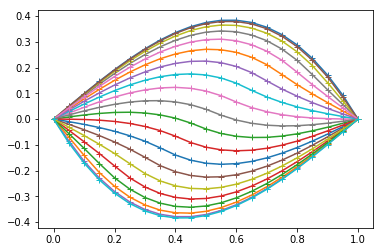

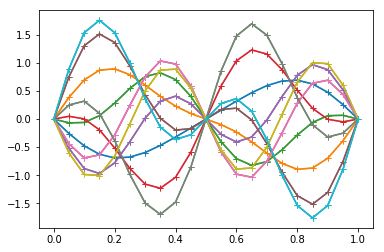

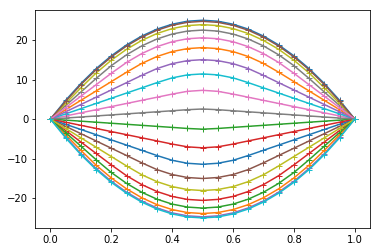

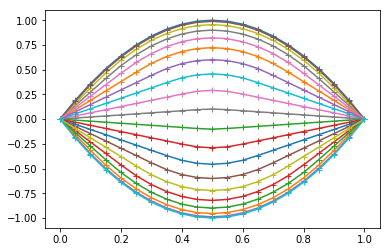

In [33]:
PAR = [
    {'u0':lambda x: -x**3+x},
    {'u0':lambda x: sympy.sin(2.0*x*sympy.pi)+sympy.sin(4.0*x*sympy.pi)},
    {'u0':lambda x: 100.0*(x-x**2)},
    {},
]

SOLS = [ wrap(detest.oracles.WaveEquation1D(P)) for P in PAR ]
plot_stack_and_save(SOLS,(0,1,21),(0,5.0,20),"wave")

# The Poisson Equation

In [ ]:
PAR = [
    {'u0':lambda x: -x**3+x},
    {'u0':lambda x: sympy.sin(2.0*x*sympy.pi)+sympy.sin(4.0*x*sympy.pi)},
    {'u0':lambda x: 100.0*(x-x**2)},
    {},
]
xs = np.linspace(0,1,21)
ts = np.linspace(0,1.0,10)
grid = np.meshgrid(xs,ts)
SOLS = [ wrap(detest.oracles.WaveEquation1D(P)) for P in PAR ]
plot_stack_and_save(SOLS)